In [ ]:
! git clone https://github.com/krasserm/super-resolution.git

Cloning into 'super-resolution'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 388 (delta 0), reused 1 (delta 0), pack-reused 385
Receiving objects: 100% (388/388), 47.38 MiB | 43.47 MiB/s, done.
Resolving deltas: 100% (200/200), done.


In [ ]:
%cd super-resolution

/content/super-resolution


In [ ]:
import os
import matplotlib.pyplot as plt

from data import DIV2K
from model.wdsr import wdsr_b
from train import WdsrTrainer

%matplotlib inline

In [ ]:

# Number of residual blocks
depth = 32

# Super-resolution factor
scale = 8

# Downgrade operator
downgrade = 'bicubic'

In [ ]:
# Location of model weights (needed for demo)
weights_dir = f'weights/'
weights_file = os.path.join(weights_dir, 'weights.h5')

os.makedirs(weights_dir, exist_ok=True)

In [ ]:
model = wdsr_b(scale=scale, num_res_blocks=depth)
model.load_weights(weights_file)

ValueError: ignored

In [ ]:

from model import resolve_single
from utils import load_image, plot_sample

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    sr = resolve_single(model, lr)
    plot_sample(lr, sr)

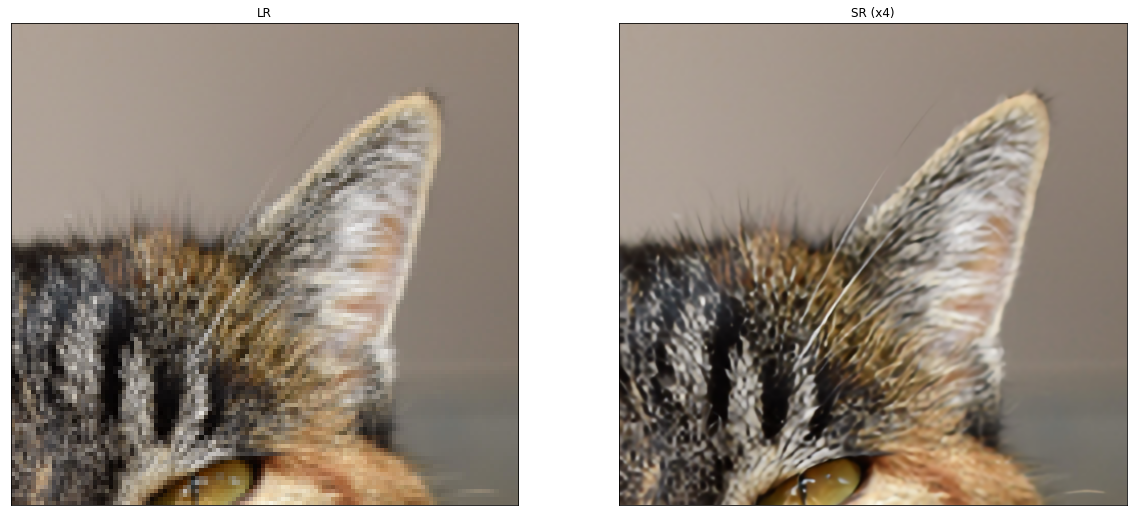

In [ ]:
resolve_and_plot('demo/0869x4-crop.png')

In [ ]:
from model.srgan import generator, discriminator
from train import SrganTrainer, SrganGeneratorTrainer

pre_generator = generator()
gan_generator = generator()

# Location of model weights (needed for demo)
weights_dir = 'weights'
weights_file = lambda filename: os.path.join(weights_dir, filename)

os.makedirs(weights_dir, exist_ok=True)

from model import resolve_single
from utils import load_image

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    
    pre_sr = resolve_single(pre_generator, lr)
    gan_sr = resolve_single(gan_generator, lr)
    
    plt.figure(figsize=(20, 20))
    
    images = [lr, pre_sr, gan_sr]
    titles = ['LR', 'SR (PRE)', 'SR (GAN)']
    positions = [1, 3, 4]
    
    for i, (img, title, pos) in enumerate(zip(images, titles, positions)):
        plt.subplot(2, 2, pos)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

pre_generator.load_weights(weights_file('pre_generator.h5'))
gan_generator.load_weights(weights_file('gan_generator.h5'))

In [ ]:
from model import resolve_single
from utils import load_image

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    
    pre_sr = resolve_single(pre_generator, lr)
    gan_sr = resolve_single(gan_generator, lr)
    
    plt.figure(figsize=(20, 20))
    
    images = [lr, pre_sr, gan_sr]
    titles = ['LR', 'SR (PRE)', 'SR (GAN)']
    positions = [1, 3, 4]
    
    for i, (img, title, pos) in enumerate(zip(images, titles, positions)):
        plt.subplot(2, 2, pos)
        plt.imshow(img)
        plt.title(title)
        # plt.xticks([])
        # plt.yticks([])

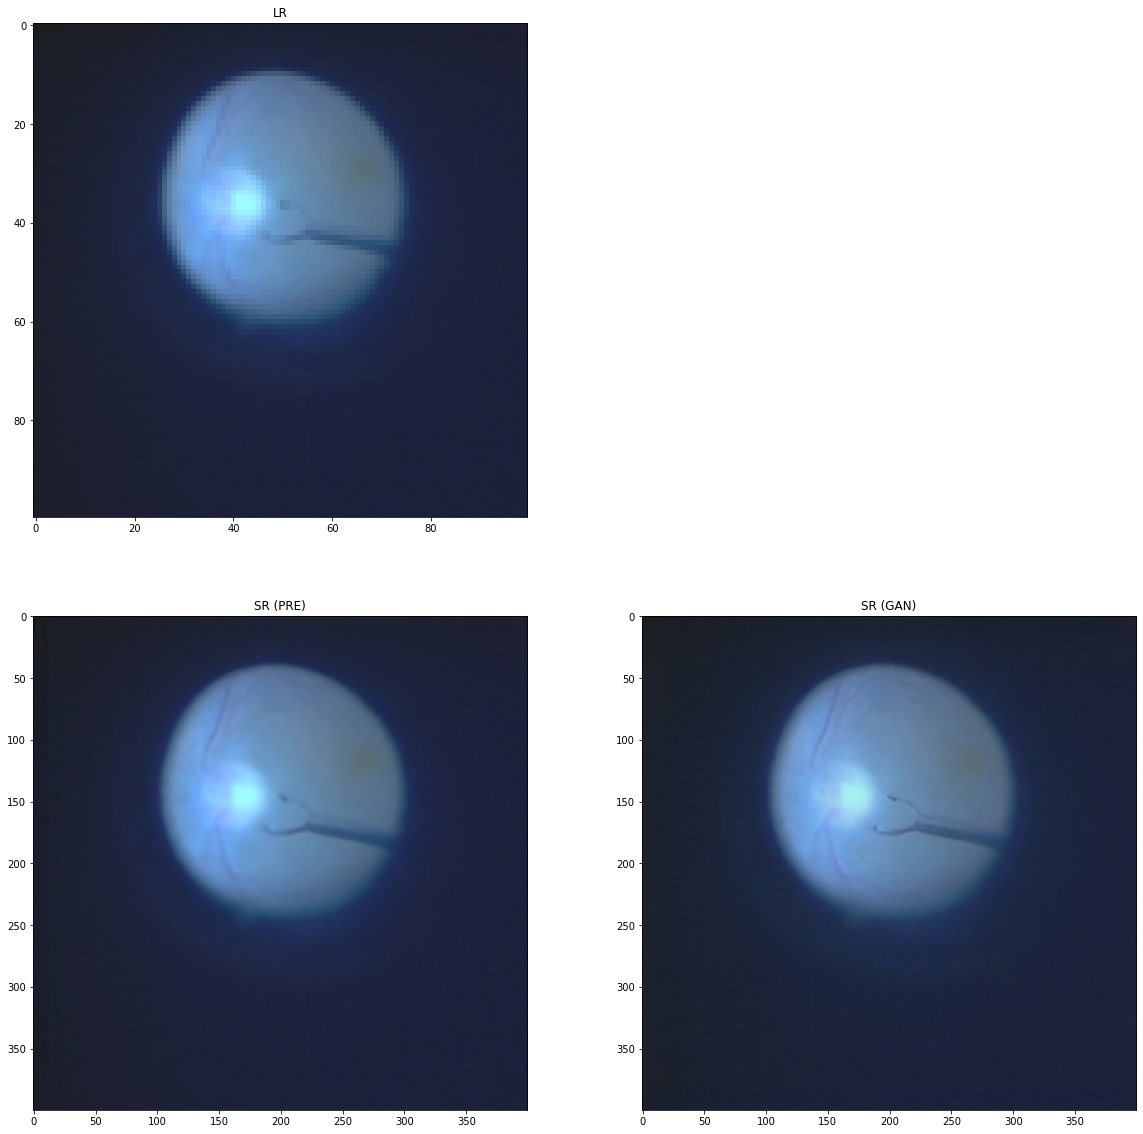

In [ ]:
resolve_and_plot('../000225.png')
# resolve_and_plot('demo/0869x4-crop.png')

'/content/super-resolution'

In [ ]:
weights_dir = f'weights/'
wsr_weights_file = os.path.join(weights_dir, 'weights.h5')

wsr_model = wdsr_b(scale=4, num_res_blocks=32)
wsr_model.load_weights(wsr_weights_file)

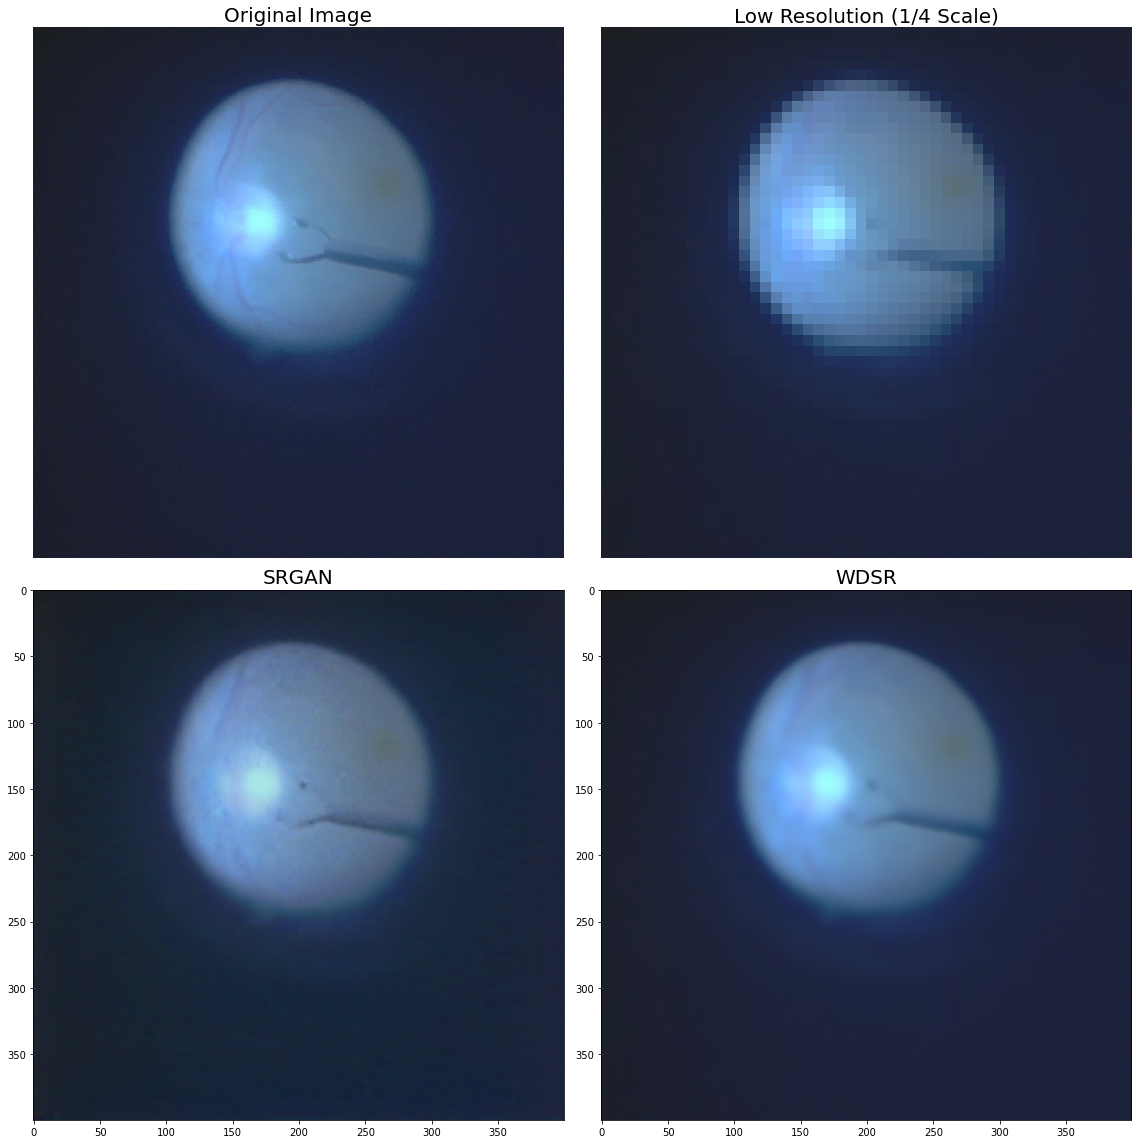

In [ ]:
from PIL import Image
import numpy as np

# original = Image.open('../img02386.png')
# lr = original.resize((int(original.size[0]/8), int(original.size[1]/8)))

# original = np.array(original).astype(np.float32)
# lr = np.array(lr).astype(np.float32)

# original = np.clip(original, 0, 255)
# lr = np.clip(lr, 0, 255)

lr = load_image('../000225.png')
original = load_image('../000225-hr.png')

plt.figure(figsize=(16,16))
plt.subplot(2, 2, 1)
plt.title('Original Image', fontsize=20)
plt.axis('off')
plt.imshow(original.astype(int))

plt.subplot(2, 2, 2)
plt.title('Low Resolution (1/4 Scale)', fontsize=20)
plt.axis('off')
plt.imshow(lr.astype(int))

plt.subplot(2, 2, 3)
gan_sr = resolve_single(gan_generator, lr)
plt.title('SRGAN', fontsize=20)
# plt.axis('off')
gan_sr = Image.fromarray(gan_sr.numpy()).resize((100,100), Image.BICUBIC)
gan_sr = resolve_single(gan_generator, np.array(gan_sr))
plt.imshow(gan_sr)

plt.subplot(2, 2, 4)
plt.title('WDSR', fontsize=20)
wsr_sr = resolve_single(wsr_model, lr)
wsr_sr = Image.fromarray(wsr_sr.numpy()).resize((100,100), Image.BICUBIC)
wsr_sr = resolve_single(wsr_model, np.array(wsr_sr))

# plt.axis('off')
plt.imshow(wsr_sr)

plt.tight_layout()
plt.savefig('SRGAN-demo.png')

In [ ]:

! gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=QktbQnANQpF773NhrAemEsxlBYQ2AV&prompt=consent&access_type=offline&code_challenge=cmyklZJfqlHKn-aKDrquVeiTyBvxt-aOe1PGZcHgZaM&code_challenge_method=S256

Enter verification code: 4/1AY0e-g7gSKkWB9B0a2Sxt9ijSVwW4yPo3kBoID9nNVI7UJb3kCvlNQMYASI

You are now logged in as [telfer006@gmail.com].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


In [ ]:
! gsutil -m cp -r gs://comp5900f/data/centered_scale-1-over-8 ..

In [ ]:
from glob import glob
import os
from PIL import Image
import numpy as np

lr_images = glob('../centered_scale-1-over-8/*.png')
output_dir = '../centered-srgan-1-over-8'

! rm -rf {output_dir}
! mkdir {output_dir}

for idx, lr_imagepath in enumerate(lr_images):
  print(f'\r{idx}/{len(lr_images)}', end='')
  filename = os.path.split(lr_imagepath)[1]
  lr_image = Image.open(lr_imagepath)
  sr_image = resolve_single(gan_generator, np.array(lr_image))
  Image.fromarray(sr_image.numpy()).save(output_dir + '/' + filename)

1154/1155

In [ ]:
! gsutil -m cp -r {output_dir} gs://comp5900f/data

Copying file://../centered-srgan-1-over-8/002024.png [Content-Type=image/png]...
Copying file://../centered-srgan-1-over-8/001843.png [Content-Type=image/png]...
Copying file://../centered-srgan-1-over-8/000383.png [Content-Type=image/png]...
Copying file://../centered-srgan-1-over-8/000258.png [Content-Type=image/png]...
Copying file://../centered-srgan-1-over-8/001391.png [Content-Type=image/png]...
Copying file://../centered-srgan-1-over-8/001437.png [Content-Type=image/png]...
Copying file://../centered-srgan-1-over-8/001494.png [Content-Type=image/png]...
Copying file://../centered-srgan-1-over-8/000305.png [Content-Type=image/png]...
Copying file://../centered-srgan-1-over-8/000482.png [Content-Type=image/png]...
Copying file://../centered-srgan-1-over-8/002025.png [Content-Type=image/png]...
Copying file://../centered-srgan-1-over-8/000285.png [Content-Type=image/png]...
Copying file://../centered-srgan-1-over-8/001531.png [Content-Type=image/png]...
Copying file://../centered-s